# Aim 

The aim of this code is to:

1. Perform more EDA in the form of clustering. We will be using Kmodes
3. Model some of the data and hopefully validate assumptions


In [1]:
#import the relavant packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from kmodes.kmodes import KModes
from kmodes import kmodes

In [2]:
# Read the data file and take a look at the data
local_folder = '.'
df = pd.read_sas(os.path.join(local_folder, 'hints5_cycle3_public.sas7bdat'),encoding='mac_roman')

#display all columns and the first couple of rows
pd.set_option('display.max_columns', None)
df.head(15);

In [3]:
df.info;

In [4]:
df['Age_groups'] = pd.cut(df['Age'], [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['10-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

Survey responses are prone to missing data in the form of non-responses and/or indeterminate data. In the HINTS data set, the missing information is identified using the following values:

**-1**: Valid skips or appropriately missing data following a dependent question (correctly skipped)

**-2**: The question was answered in error by the respondent

**-4**: unreadable or non-conforming numeric response)

**-5**: Respondent selected more response options than appropriate for the question

**-6**: Missing data in variables following a missing filter question

**-7**: Missing data (exclusive to web mode respondent variables)

**-9**: Missing data. Not ascertained

We need to figure out if the missing data is randomly missing or not. We can do this by visual inspect as done below for the Age variable


In [5]:
#Visually inspect the Age missing data
df.loc[df.Age == -9.0,:].head(60);

It appears the missing Age data is randomly missing. A similar inspections on other variables of interest yields similar results.
Suppose for interest's sake that we remove the rows with missing Age data (this includes rows with -9, -7 and -4 values). The result dataframe will be as follows

In [6]:
#replace missing data with NaN, remove Age values with NaN
df['Age'].replace([-9.0,-4.0,-7.0], np.nan, inplace = True)

drop_df=df.dropna(subset=["Age"])

The data contains a lot of categorical data that falls under these sections:


**1**: Responses about looking for health information

**2**: Responses about using the internet to find information

**3**: Responses about the respondent's health care

**4**: Responses about the respondent's medical records etc.

Below we select some variables of interest


In [7]:
age =['Age','Age_groups']
hlth_info = ['SeekHealthInfo']
electronic_info = ['UseInternet','Electronic_SelfHealthInfo','Electronic_BuyMedicine','Electronic_TalkDoctor',\
                   'Electronic_TrackedHealthCosts','Electronic_TestResults','Electronic_MadeAppts', \
                   'HaveDevice_Cat', 'TabletHealthWellnessApps', 'Tablet_AchieveGoal','Tablet_MakeDecision','AccessUsingHealthApp']
med_records = ['UnderstandOnlineMedRec','UsefulOnlineMedRec']

In [8]:
#convert missing data to NaN
#df['SeekHealthInfo'].replace(-9.0, np.nan, inplace = True)
#df['UseInternet'].replace(-9.0, np.nan, inplace = True)
#df['Electronic_SelfHealthInfo'].replace(-9.0, np.nan, inplace = True)
#df['Electronic_BuyMedicine'].replace(-9.0, np.nan, inplace = True)
#df['Electronic_TalkDoctor'].replace(-9.0, np.nan, inplace = True)
#df['Electronic_TrackedHealthCosts'].replace(-9.0, np.nan, inplace = True)
#df['Electronic_MadeAppts'].replace(-9.0, np.nan, inplace = True)

In the following section we perform the clustering. This kmode method was inspired by an example found at the link given here https://www.kaggle.com/ashydv/bank-customer-clustering-k-modes-clustering We select the variables of interest and run the model 

In [9]:
#clustering internet information seeking behavior
electronic_df = df[electronic_info]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 28561.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 612, cost: 21303.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1241, cost: 19257.0
Run 1, iteration: 2/100, moves: 611, cost: 18229.0
Run 1, iteration: 3/100, moves: 137, cost: 18229.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1175, cost: 17396.0


Text(0.5,0,'Number of Clusters (k)')

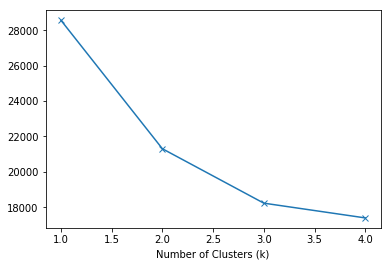

In [10]:
#Find the best k
cost = []
K_range = range(1, 5)

for k_num in K_range:
    modes = KModes(n_clusters=k_num, init = "Cao", n_init = 1, verbose=1)
    modes.fit_predict(electronic_df.astype(str))
    cost.append(modes.cost_)
    
y = np.array([i for i in range(1,5,1)])
plt.plot(K_range,cost, marker='x')
plt.xlabel('Number of Clusters (k)')


In [11]:

cao_k = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
run_model = cao_k.fit_predict(electronic_df.astype(str))

clusters = pd.DataFrame(run_model)
clusters.columns = ['clusters']

centroid_df = pd.DataFrame(cao_k.cluster_centroids_)
centroid_df.columns = electronic_df.columns

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1241, cost: 19257.0
Run 1, iteration: 2/100, moves: 611, cost: 18229.0
Run 1, iteration: 3/100, moves: 137, cost: 18229.0


In [12]:
clusters

,clusters
0,2
1,0
2,0
3,0
4,0
5,2
6,0
7,2
8,2
9,1


In [13]:
final_df = pd.concat([df[age + electronic_info], clusters], axis = 1).reset_index()

final_df

,index,Age,Age_groups,UseInternet,Electronic_SelfHealthInfo,Electronic_BuyMedicine,Electronic_TalkDoctor,Electronic_TrackedHealthCosts,Electronic_TestResults,Electronic_MadeAppts,HaveDevice_Cat,TabletHealthWellnessApps,Tablet_AchieveGoal,Tablet_MakeDecision,AccessUsingHealthApp,clusters
0,0,71.0,70-80,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,-1.0,-1.0,-1.0,-9.0,2
1,1,47.0,40-50,1.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,2.0,-2.0,0
2,2,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,0
3,3,65.0,60-70,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,-2.0,-1.0,-1.0,-1.0,0
4,4,45.0,40-50,1.0,1.0,2.0,2.0,2.0,-9.0,2.0,5.0,2.0,2.0,1.0,-2.0,0
5,5,70.0,60-70,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,-1.0,-2.0,-2.0,-2.0,2
6,6,53.0,50-60,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,-1.0,0
7,7,80.0,70-80,2.0,2.0,2.0,2.0,2.0,-9.0,2.0,3.0,-1.0,-1.0,-1.0,-2.0,2
8,8,NaN,NaN,2.0,2.0,-9.0,-9.0,1.0,2.0,2.0,3.0,-2.0,-2.0,-2.0,-9.0,2
9,9,23.0,20-30,1.0,1.0,2.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1


In [14]:
final_df = final_df.drop(['index'], axis = 1)

clust1 = final_df[final_df['clusters'] == 0]
clust2 = final_df[final_df['clusters'] == 1]
clust3 = final_df[final_df['clusters'] == 2]

In [15]:

clust3

,Age,Age_groups,UseInternet,Electronic_SelfHealthInfo,Electronic_BuyMedicine,Electronic_TalkDoctor,Electronic_TrackedHealthCosts,Electronic_TestResults,Electronic_MadeAppts,HaveDevice_Cat,TabletHealthWellnessApps,Tablet_AchieveGoal,Tablet_MakeDecision,AccessUsingHealthApp,clusters
0,71.0,70-80,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,-1.0,-1.0,-1.0,-9.0,2
5,70.0,60-70,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,-1.0,-2.0,-2.0,-2.0,2
7,80.0,70-80,2.0,2.0,2.0,2.0,2.0,-9.0,2.0,3.0,-1.0,-1.0,-1.0,-2.0,2
8,NaN,NaN,2.0,2.0,-9.0,-9.0,1.0,2.0,2.0,3.0,-2.0,-2.0,-2.0,-9.0,2
10,89.0,80-90,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,-2.0,-2.0,-2.0,-2.0,2
12,93.0,90-100,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,-1.0,-1.0,-1.0,-2.0,2
17,71.0,70-80,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-6.0,-6.0,-6.0,-2.0,2
22,47.0,40-50,2.0,2.0,2.0,-9.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,-2.0,2
25,89.0,80-90,2.0,2.0,2.0,-9.0,-9.0,-9.0,-9.0,2.0,3.0,2.0,-9.0,-2.0,2
28,91.0,90-100,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,-1.0,-1.0,-1.0,-2.0,2


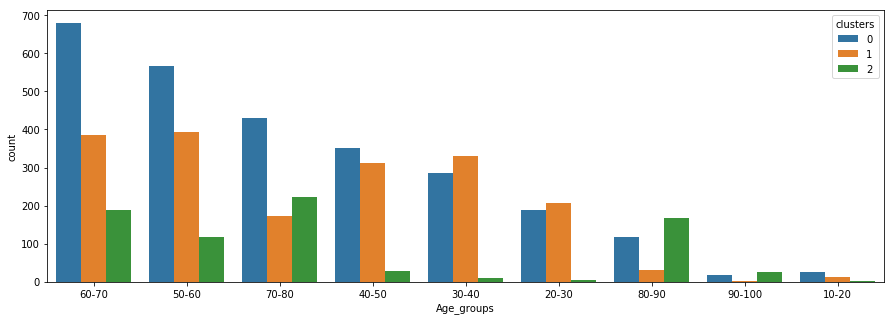

In [16]:
plt.subplots(figsize = (15,5))
sns.countplot(x=final_df['Age_groups'],order=final_df['Age_groups'].value_counts().index,hue=final_df['clusters'])
plt.show()

In [17]:
centroid_df

,UseInternet,Electronic_SelfHealthInfo,Electronic_BuyMedicine,Electronic_TalkDoctor,Electronic_TrackedHealthCosts,Electronic_TestResults,Electronic_MadeAppts,HaveDevice_Cat,TabletHealthWellnessApps,Tablet_AchieveGoal,Tablet_MakeDecision,AccessUsingHealthApp
0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,2.0,-1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,2.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,-1.0,-1.0,-1.0,-2.0
